In [1]:
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import pandas as pd
import datetime as dt

In [15]:
df=pd.read_csv('Problem_C_Data_Wordle1.csv')


In [16]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Percent in,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),expectation,index
1,12/31/2022,560,manly,20380,1899,0,2,17,37,29,12,2,4.34,1
2,12/30/2022,559,molar,21204,1973,0,4,21,38,26,9,1,4.14,2
3,12/29/2022,558,havoc,20001,1919,0,2,16,38,30,12,2,4.4,3
4,12/28/2022,557,impel,20160,1937,0,3,21,40,25,9,1,4.15,4


In [35]:
#create the list of daily hardmode ratio and expectation
for i in range(1,360):
    df.iloc[i,3]=int(df.iloc[i,3])
    df.iloc[i,4]=int(df.iloc[i,4])
ratio=[]
for i in range(1,360):
    ratio.append(df.iloc[i,4]/df.iloc[i,3])
#print(ratio)

expectation=[]
for i in range(1,360):
    expectation.append(float(df.iloc[i,12]))
#print(expectation)

y=[]
for i in range(1,360):
    y.append(int(df.iloc[i,5]))
date=[dt.datetime.strptime(d,'%m/%d/%Y').date() for d in df.iloc[1:,0]]

In [29]:
#calculate the corelation index
import statistics as st
covariance_matrix=np.cov(ratio,expectation)
covariance=covariance_matrix[0][1]
print(covariance)
stdev_ratio=st.stdev(ratio)
stdev_expect=st.stdev(expectation)
print(stdev_ratio)
print(stdev_expect)
corelation_index=covariance/(stdev_ratio*stdev_expect)
print(corelation_index)

2.3449385784379023e-05
0.05058653465890615
0.4036552076328683
0.0011483809564349422


In [36]:
#plot the graph of expectation and hardmode ratio
#calculate the mean of expectation and hardmode ratio
mean_ratio=sum(ratio)/len(ratio)
mean_expect=sum(expectation)/len(expectation)

C=mean_expect/mean_ratio
ratio_enlarge=[]
for i in ratio:
    ratio_enlarge.append(i*C)
print(C)

54.00111894022479


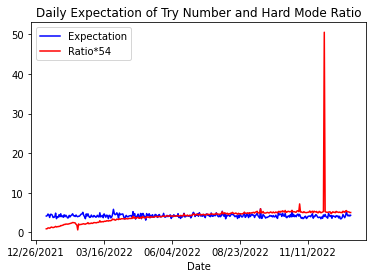

In [41]:
#plot the expectation and hardmode ratio in one graph
import matplotlib.dates as mdates
plt.figure()
plt.title('Daily Expectation of Try Number and Hard Mode Ratio')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=80))
plt.xlabel('Date')
plt.plot(date,expectation,color='blue',label='Expectation')
plt.plot(date,ratio_enlarge,color='red',label='Ratio*54')
plt.legend()

In [40]:
# then calculate the relationship between date index and expectation
date_index=[]
for i in range(359):
    date_index.append(i)
covariance_matrix2=np.cov(date_index,expectation)
covariance2=covariance_matrix[0][1]
stdev_date_index=st.stdev(date_index)
corelation_index=covariance2/(stdev_date_index*stdev_expect)
print(corelation_index)

5.597744348973633e-07
